<a href="https://colab.research.google.com/github/compnaion/Test/blob/main/Find%20the%20Difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2

In [3]:
im1 = cv2.imread('1.jpg')
im2 = cv2.imread('2.jpg')

grayA = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

In [ ]:
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.933443522282176


In [4]:
thresh = cv2.threshold(grayA, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

thresh2 = cv2.threshold(grayB, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

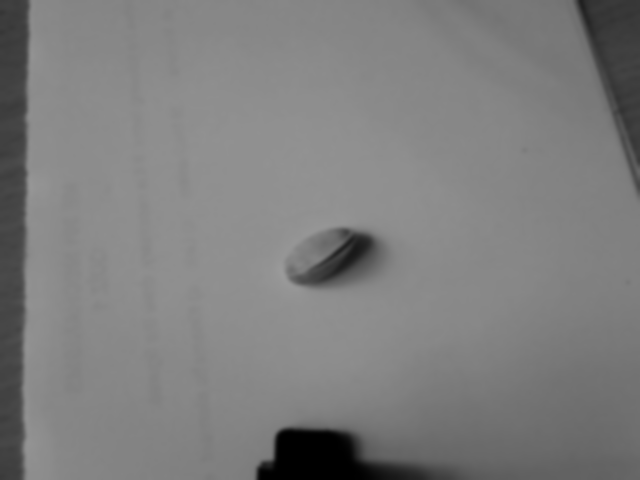

In [5]:
cv2_imshow(cv2.GaussianBlur(grayA,(11,11),0))

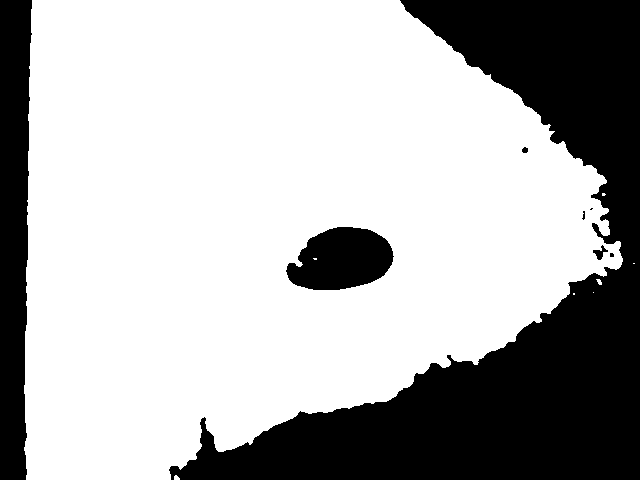

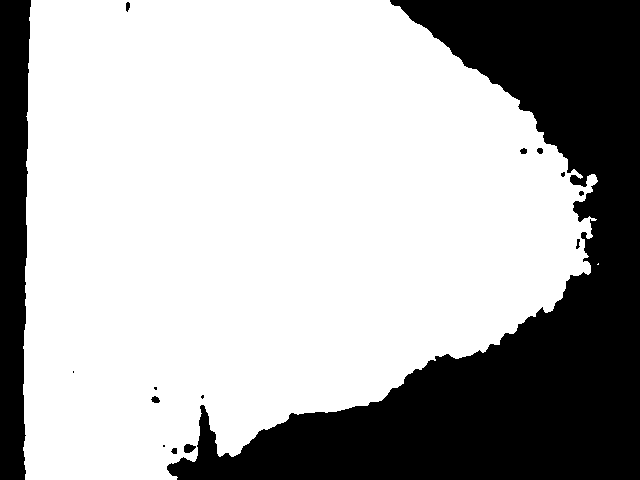

In [6]:
ret, thresh4 = cv2.threshold(cv2.GaussianBlur(grayA,(13,13),0),130,255,cv2.THRESH_BINARY)
cv2_imshow(thresh4)

ret, thresh3 = cv2.threshold(cv2.GaussianBlur(grayB,(13,13),0),130,255,cv2.THRESH_BINARY)
cv2_imshow(thresh3)

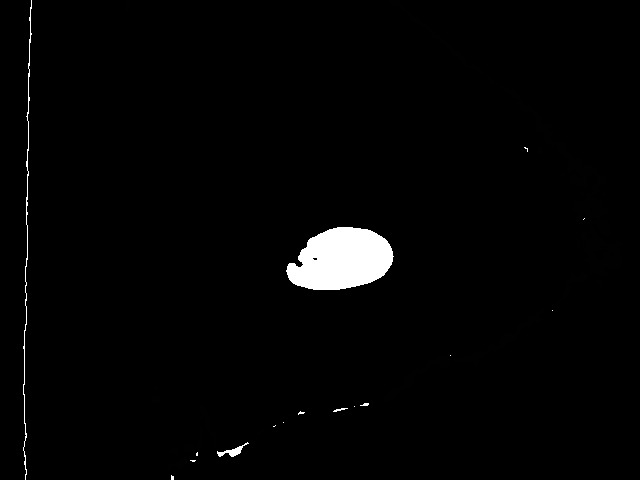

In [9]:
cv2_imshow(thresh3-thresh4)
contours, hierarchy = cv2.findContours(thresh3-thresh4, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
cv2.contourArea(contours[i])

In [18]:
for i in range(len(contours)):
  print(cv2.contourArea(contours[i]))
  if cv2.contourArea(contours[i])>1000:
    print("i=",i)

3.0
6.5
3.0
91.5
2.5
20.0
1.0
64.0
117.5
14.0
0.0
0.0
0.0
0.0
25.0
0.0
0.0
6.5
0.0
12.0
0.0
146.0
9.5
3.0
33.0
4.5
3.5
0.0
0.0
422.0
2.5
0.0
517.0
1.0
0.0
14.5
0.0
14.5
4886.5
i= 38
11.5
5.0
13.0
9.5
4.0
21.5
1.5
20.5
3227.5
i= 47
5.5
21.5
116.5
24.0
7.0
72.0


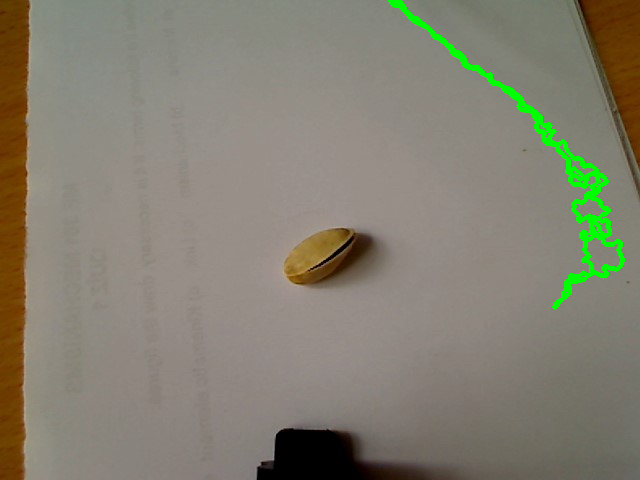

In [21]:
im3 = cv2.imread('1.jpg')
cv2_imshow(cv2.drawContours(im3, contours, 47, (0,255,0), 3))